In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
dfx=pd.read_csv("Logistic_X_Train.csv")
dfy=pd.read_csv("Logistic_Y_Train.csv")
dfx.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [3]:
dfy.head()

,label
0,1
1,1
2,1
3,0
4,0


In [4]:
y_train=dfy['label']
y_train=np.array(y_train)
y_train

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [5]:
x_train=[]
x_train.append(dfx['f1'])
x_train.append(dfx['f2'])
x_train.append(dfx['f3'])

In [6]:
x_train=np.array(x_train)
x_train=np.matrix.transpose(x_train)

In [7]:
x_train.shape[0]

3000

In [8]:
x_train[0]

array([-1.23937466,  0.74910149, -0.52851491])

In [9]:
df=pd.read_csv("Logistic_X_Test.csv")
x_test=[]
x_test.append(dfx['f1'])
x_test.append(dfx['f2'])
x_test.append(dfx['f3'])

In [10]:
x_test=np.array(x_test)
x_test=np.matrix.transpose(x_test)

In [11]:
x_test.shape

(3000, 3)

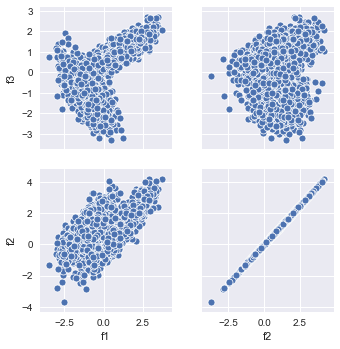

In [12]:
sns.pairplot(dfx,x_vars=['f1','f2'],y_vars=['f3','f2'])

In [27]:
def hypothesis(x,theta):
    hx=theta[0]
    for i in range(0,3):
        hx+=x[i]*theta[i+1]
    return sigmoid(hx)

In [28]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [29]:
def error(x,y,theta):
    err=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        err+=np.log2(hx)*y[i]+np.log2(1-hx)*(1-y[i])
    return err

In [30]:
def get_grad(x,y,theta):
    grad=np.zeros((4,))
    for i in range(0,x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0]+=y[i]-hx
        for j in range(0,3):
            grad[j+1]+=(y[i]-hx)*x[i][j]
    return grad

In [31]:
def predict(x,theta):
    p=hypothesis(x,theta)
    if p>0.5:
        return 1
    else:
        return 0

In [32]:
def get_acc(x,y,theta):
    pred=[]
    for i in range(0,x.shape[0]):
        p=predict(x[i],theta)
        pred.append(p)
    pred=np.array(pred)
    return float((pred==y).sum())/y.shape[0] 

In [33]:
def gradientAscent(x,y,learningRate=0.001):
    loss=[]
    accuracy=[]
    theta=np.zeros((4,),dtype='float')
    for i in range(0,1000):
        err=error(x,y,theta)
        loss.append(err)
        accuracy.append(get_acc(x,y,theta))
        grad=get_grad(x,y,theta)
        for j in range(0,4):
            theta[j]+=learningRate*grad[j]
    return loss,theta,accuracy

In [34]:
def result(x,theta):
    res=[]
    for i in range(0,x.shape[0]):
        res.append(predict(x[i],theta))
    return res

In [35]:
loss,final_theta,accuracy=gradientAscent(x_train,y_train)

In [37]:
y_test=result(x_test,final_theta)

In [38]:
print(y_test)

[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 

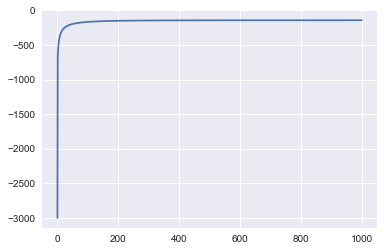

In [36]:
plt.plot(loss)
plt.show()

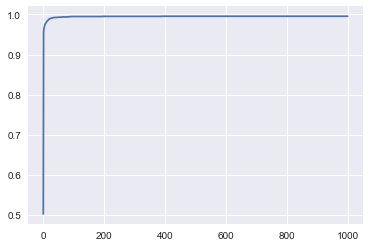

In [52]:
plt.plot(accuracy)
plt.show()

In [54]:
print(accuracy[-1])
print(loss[-1])

0.9953333333333333
-141.37793647112701


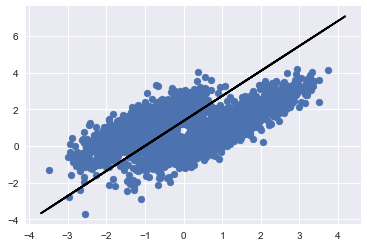

In [51]:
plt.scatter(np.matrix.transpose(x_test)[0],np.matrix.transpose(x_test)[1])
y = -(final_theta[0]*x_test+ final_theta[0])/final_theta[2]
plt.plot(x_test,y,color='black')
plt.show()